In [45]:
# https://www.kaggle.com/competitions/playground-series-s4e12

import pandas as pd
import matplotlib.pyplot as plt

In [46]:
train, test = pd.read_csv('data/train.csv'), pd.read_csv('data/test.csv')

[EDA | LightGBM & Optuna | 1.0644 | V1](https://www.kaggle.com/code/adrienmorel97/eda-lightgbm-optuna-1-0644-v1)

In [47]:
train.head()

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's            NaN     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's            NaN     10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed     20.376094     Rural  ...             0.0   

   Vehicle Age  Credit Score  Insurance Duration           Policy Start Date  \
0         17.0         372.0                 5.0  2023-12-23 15:21:39.134960   
1         12.0         694.0                 2.0  2023-06-12 15:21:39.111551   
2         14.0           NaN                 3.0  2023-09-30 15:21:39.221386   
3          0.0         367.0                 1.0  2024-06-12 15:21:39.226954   
4          8.0         598.0                 4.0  2021-12-01 15:21:39.252145   

  Customer Feedback Smoking Status Exercise Frequency Property Type  \
0              Poor             No             Weekly         House   
1           Average            Yes            Monthly         House   
2              Good            Yes             Weekly         House   
3              Poor            Yes              Daily     Apartment   
4              Poor            Yes             Weekly         House   

  Premium Amount  
0         2869.0  
1         1483.0  
2          567.0  
3          765.0  
4         2022.0  

[5 rows x 21 columns]

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [49]:
# Segregating Columns

target_col = 'Premium Amount'

cat_cols = train.select_dtypes(include=['object']).columns
num_cols = train.select_dtypes(exclude=['object']).columns

print(f'Target Column: {target_col}')
print(f'\nCategorical Columns: {cat_cols.tolist()}')
print(f'\nNumerical Columns: {num_cols.tolist()}')

Target Column: Premium Amount

Categorical Columns: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']

Numerical Columns: ['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']


### Descriptive Statistics

In [50]:
train.describe().round(2)

id         Age  Annual Income  Number of Dependents  \
count  1200000.00  1181295.00     1155051.00            1090328.00   
mean    599999.50       41.15       32745.22                  2.01   
std     346410.31       13.54       32179.51                  1.42   
min          0.00       18.00           1.00                  0.00   
25%     299999.75       30.00        8001.00                  1.00   
50%     599999.50       41.00       23911.00                  2.00   
75%     899999.25       53.00       44634.00                  3.00   
max    1199999.00       64.00      149997.00                  4.00   

       Health Score  Previous Claims  Vehicle Age  Credit Score  \
count    1125924.00        835971.00   1199994.00    1062118.00   
mean          25.61             1.00         9.57        592.92   
std           12.20             0.98         5.78        149.98   
min            2.01             0.00         0.00        300.00   
25%           15.92             0.00         5.00        468.00   
50%           24.58             1.00        10.00        595.00   
75%           34.53             2.00        15.00        721.00   
max           58.98             9.00        19.00        849.00   

       Insurance Duration  Premium Amount  
count          1199999.00      1200000.00  
mean                 5.02         1102.54  
std                  2.59          865.00  
min                  1.00           20.00  
25%                  3.00          514.00  
50%                  5.00          872.00  
75%                  7.00         1509.00  
max                  9.00         4999.00

In [51]:
for col in cat_cols:
    print(f"\n'{col}' has {train[col].nunique()} unique categories.")
    print(f"\nTop value counts in {col}:\n{train[col].value_counts().head(5)}\n")


'Gender' has 2 unique categories.

Top value counts in Gender:
Gender
Male      602571
Female    597429
Name: count, dtype: int64


'Marital Status' has 3 unique categories.

Top value counts in Marital Status:
Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64


'Education Level' has 4 unique categories.

Top value counts in Education Level:
Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64


'Occupation' has 3 unique categories.

Top value counts in Occupation:
Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64


'Location' has 3 unique categories.

Top value counts in Location:
Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64


'Policy Type' has 3 unique categories.

Top value counts in Policy Type:
Policy Type
Premium          401846
Comprehensive    399600

In [52]:
print(f"Mean for Numerical Columns\n{train[num_cols].mean()}")
print(f"\n\nStd-dev for Numerical Columns\n{train[num_cols].std()}")
print(f"\n\nSkew for Numerical Columns\n{train[num_cols].skew().round(5)}")


Mean for Numerical Columns
id                      599999.500000
Age                         41.145563
Annual Income            32745.217777
Number of Dependents         2.009934
Health Score                25.613908
Previous Claims              1.002689
Vehicle Age                  9.569889
Credit Score               592.924350
Insurance Duration           5.018219
Premium Amount            1102.544822
dtype: float64


Std-dev for Numerical Columns
id                      346410.305852
Age                         13.539950
Annual Income            32179.506124
Number of Dependents         1.417338
Health Score                12.203462
Previous Claims              0.982840
Vehicle Age                  5.776189
Credit Score               149.981945
Insurance Duration           2.594331
Premium Amount             864.998859
dtype: float64


Skew for Numerical Columns
id                      0.00000
Age                    -0.01253
Annual Income           1.47036
Number of Dependents   -0.

### Data Cleaning Insight

In [53]:
# Filter columns with missing values and their quantity

train.isna().sum(0).loc[lambda x: x > 0]

Age                      18705
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Occupation              358075
Health Score             74076
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Customer Feedback        77824
dtype: int64

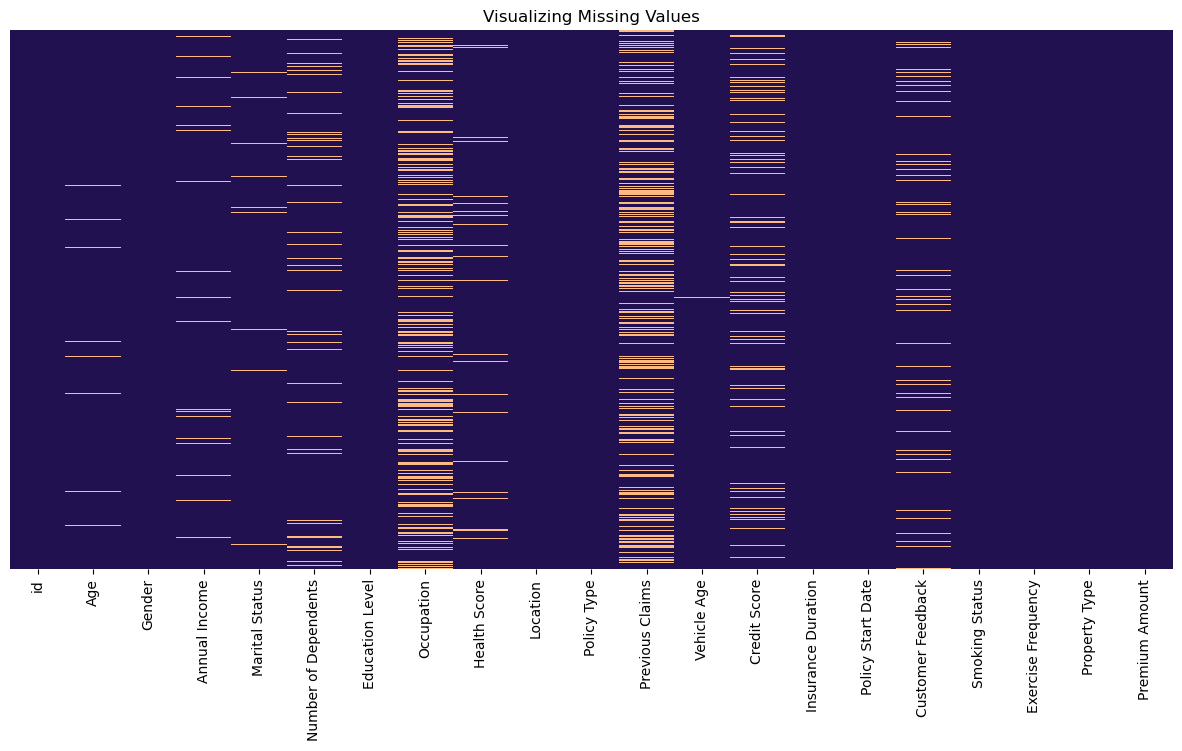

In [54]:
import seaborn as sns

plt.figure(figsize=(15, 7))
plt.title("Visualizing Missing Values")
sns.heatmap(train.isna(), cbar=False, cmap=sns.color_palette('magma'), yticklabels=False);
plt.show()

In [55]:
# Check for missing values in the datasets
missing_train = train.isnull()
missing_test = test.isnull()


# Function to calculate missing values, percentages, and data types
def missing_values_table(df):
    missing_count = df.isnull().sum()
    missing_percentage = 100 * missing_count / len(df)
    data_types = df.dtypes
    return pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage (%)': missing_percentage,
        'Data Type': data_types
    })

# Create tables for train and test datasets
train_missing_table = missing_values_table(train)
test_missing_table = missing_values_table(test)

# Display the tables
print("Missing Values Table - Training Dataset:\n")
display(train_missing_table[train_missing_table['Missing Values'] > 0])  # Display only features with missing values
print("\n")

print("Missing Values Table - Test Dataset:\n")
display(test_missing_table[test_missing_table['Missing Values'] > 0])  

Missing Values Table - Training Dataset:



Missing Values  Percentage (%) Data Type
Age                            18705        1.558750   float64
Annual Income                  44949        3.745750   float64
Marital Status                 18529        1.544083    object
Number of Dependents          109672        9.139333   float64
Occupation                    358075       29.839583    object
Health Score                   74076        6.173000   float64
Previous Claims               364029       30.335750   float64
Vehicle Age                        6        0.000500   float64
Credit Score                  137882       11.490167   float64
Insurance Duration                 1        0.000083   float64
Customer Feedback              77824        6.485333    object



Missing Values Table - Test Dataset:



Missing Values  Percentage (%) Data Type
Age                            12489        1.561125   float64
Annual Income                  29860        3.732500   float64
Marital Status                 12336        1.542000    object
Number of Dependents           73130        9.141250   float64
Occupation                    239125       29.890625    object
Health Score                   49449        6.181125   float64
Previous Claims               242802       30.350250   float64
Vehicle Age                        3        0.000375   float64
Credit Score                   91451       11.431375   float64
Insurance Duration                 2        0.000250   float64
Customer Feedback              52276        6.534500    object

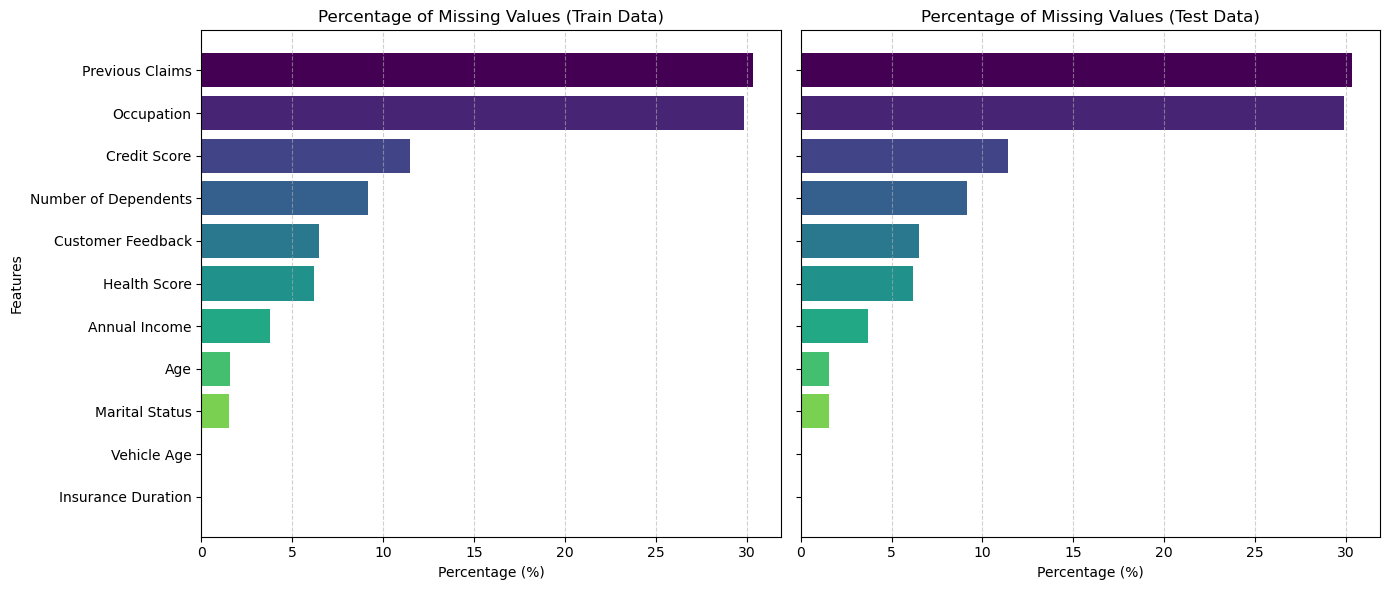

In [57]:
# Filter missing values for train and test datasets
train_missing = train_missing_table[train_missing_table['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)
test_missing = test_missing_table[test_missing_table['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Bar plot for train dataset
train_colors = plt.get_cmap('viridis', len(train_missing))(range(len(train_missing)))
axes[0].barh(train_missing.index, train_missing['Percentage (%)'], color=train_colors)
axes[0].set_title('Percentage of Missing Values (Train Data)', fontsize=12)
axes[0].set_xlabel('Percentage (%)', fontsize=10)
axes[0].set_ylabel('Features', fontsize=10)
axes[0].grid(axis='x', linestyle='--', alpha=0.6)
axes[0].invert_yaxis()  

# Bar plot for test dataset
test_colors = plt.get_cmap('viridis', len(test_missing))(range(len(test_missing)))
axes[1].barh(test_missing.index, test_missing['Percentage (%)'], color=test_colors)
axes[1].set_title('Percentage of Missing Values (Test Data)', fontsize=12)
axes[1].set_xlabel('Percentage (%)', fontsize=10)
axes[1].grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [58]:
# Filter only features with missing values in the training dataset
features_with_missing = train_missing_table[train_missing_table['Missing Values'] > 0].index.tolist()

def analyze_nan_with_target_filtered(df, target_column, features):
    missing_analysis = {}
    
    for col in features:
        # Split the data into missing and non-missing subsets for the column
        missing_mask = df[col].isnull()
        non_missing_mask = ~missing_mask
        
        # Calculate statistics for Premium Amount
        stats = {
            "Missing Count": missing_mask.sum(),
            "Non-Missing Count": non_missing_mask.sum(),
            "Mean (Missing)": df.loc[missing_mask, target_column].mean(),
            "Mean (Non-Missing)": df.loc[non_missing_mask, target_column].mean(),
            "Median (Missing)": df.loc[missing_mask, target_column].median(),
            "Median (Non-Missing)": df.loc[non_missing_mask, target_column].median(),
            "Std Dev (Missing)": df.loc[missing_mask, target_column].std(),
            "Std Dev (Non-Missing)": df.loc[non_missing_mask, target_column].std(),
        }
        
        missing_analysis[col] = stats
    
    return pd.DataFrame(missing_analysis).T

# Perform the analysis for only features with missing values
missing_vs_premium_filtered = analyze_nan_with_target_filtered(train, "Premium Amount", features_with_missing)

# Display the results
print("Analysis of Missing Values with Target (Premium Amount):\n")
display(missing_vs_premium_filtered)

Analysis of Missing Values with Target (Premium Amount):



Missing Count  Non-Missing Count  Mean (Missing)  \
Age                         18705.0          1181295.0     1096.003689   
Annual Income               44949.0          1155051.0      930.200605   
Marital Status              18529.0          1181471.0     1217.871067   
Number of Dependents       109672.0          1090328.0     1126.441571   
Occupation                 358075.0           841925.0     1093.320969   
Health Score                74076.0          1125924.0     1158.043172   
Previous Claims            364029.0           835971.0     1076.944592   
Vehicle Age                     6.0          1199994.0     1197.833333   
Credit Score               137882.0          1062118.0     1085.615773   
Insurance Duration              1.0          1199999.0     1044.000000   
Customer Feedback           77824.0          1122176.0     1189.619526   

                      Mean (Non-Missing)  Median (Missing)  \
Age                          1102.648396             873.0   
Annual Income                1109.251625             556.0   
Marital Status               1100.736161            1001.0   
Number of Dependents         1100.141137             892.0   
Occupation                   1106.467773             861.0   
Health Score                 1098.893513             930.0   
Previous Claims              1113.692608             845.0   
Vehicle Age                  1102.544345             935.5   
Credit Score                 1104.742516             845.0   
Insurance Duration           1102.544870            1044.0   
Customer Feedback            1096.506106             956.0   

                      Median (Non-Missing)  Std Dev (Missing)  \
Age                                  872.0         862.234397   
Annual Income                        882.0         959.098967   
Marital Status                       871.0         904.286237   
Number of Dependents                 871.0         885.171044   
Occupation                           876.0         859.637058   
Health Score                         867.0         782.759101   
Previous Claims                      882.0         852.091240   
Vehicle Age                          872.0         855.199022   
Credit Score                         874.0         874.343015   
Insurance Duration                   872.0                NaN   
Customer Feedback                    863.0         883.866640   

                      Std Dev (Non-Missing)  
Age                              865.042527  
Annual Income                    860.432015  
Marital Status                   864.246334  
Number of Dependents             862.907498  
Occupation                       867.239987  
Health Score                     870.013254  
Previous Claims                  870.324942  
Vehicle Age                      864.999234  
Credit Score                     863.754490  
Insurance Duration               864.999218  
Customer Feedback                863.349897

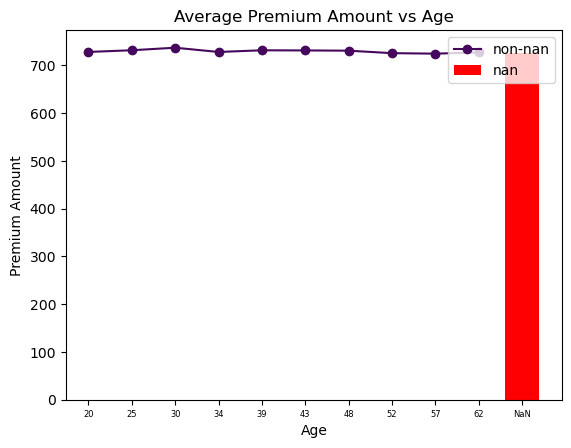

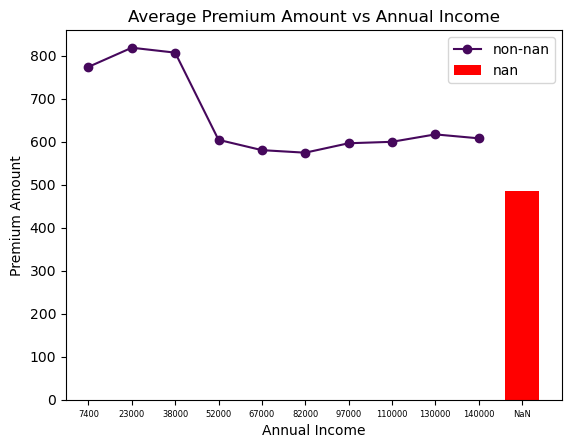

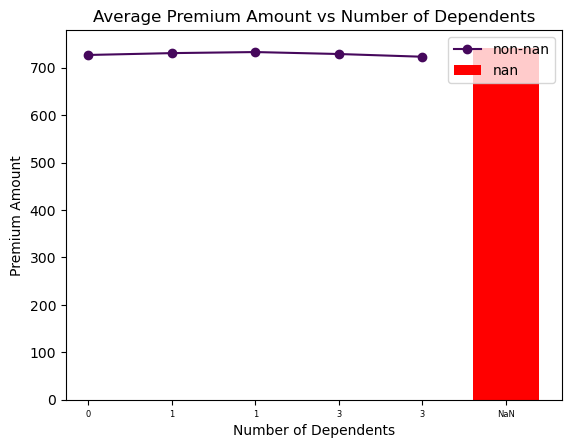

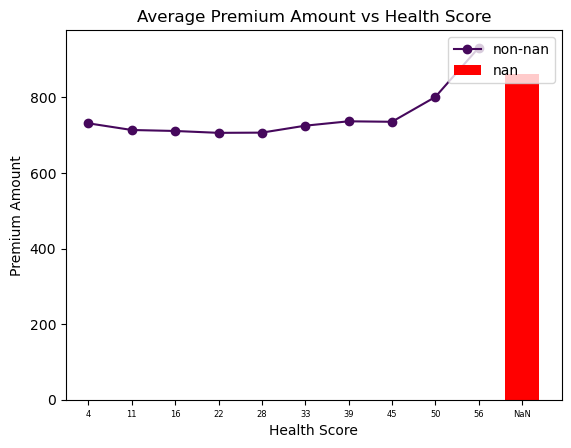

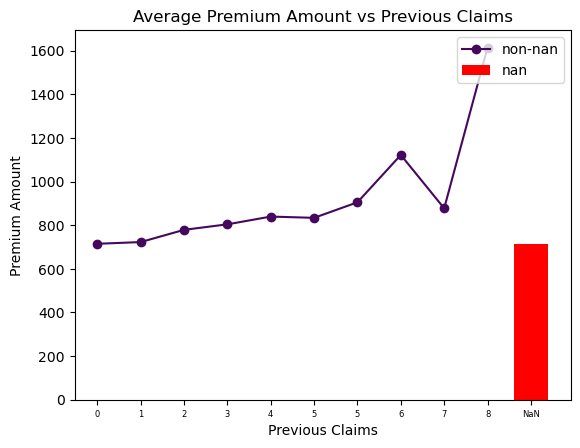

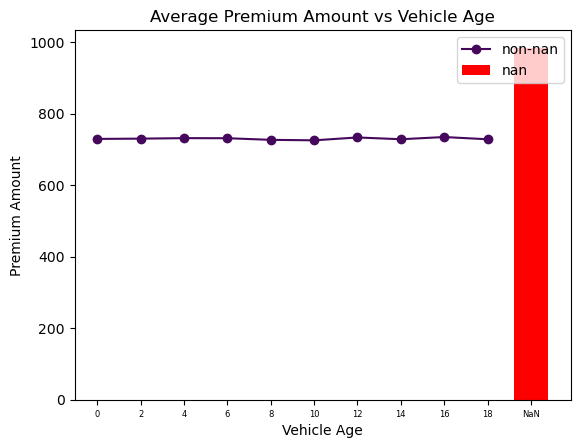

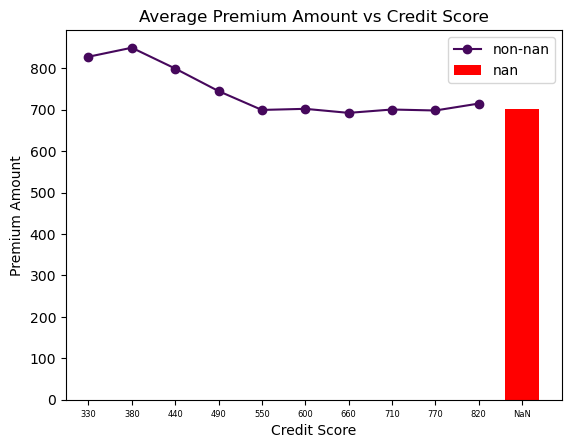

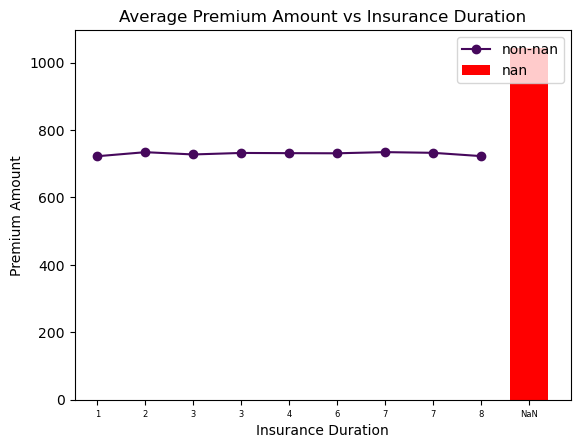

In [59]:
import numpy as np
from matplotlib.cm import viridis

# List of float-type columns with missing values
float_missing_columns = ['Age', 'Annual Income', 'Number of Dependents', 
                         'Health Score', 'Previous Claims', 'Vehicle Age', 
                         'Credit Score', 'Insurance Duration']

for column in float_missing_columns:
    # Drop NaN values for binning, but retain the NaN group separately
    valid_data = train[column].dropna()
    bins = 10  

    # Bin the non-NaN values
    binned_data = pd.cut(valid_data, bins)
    df = pd.DataFrame({
        column: binned_data,
        'Premium Amount': train.loc[valid_data.index, 'Premium Amount']
    })
    
    # Group by the binned column and calculate mean Premium Amount
    grouped = df.groupby(column, observed=True, dropna=False).agg(
        lambda x: np.expm1(np.log1p(x).mean())
    ).reset_index()
    
    # Add the NaN group separately
    nan_group_mean = np.expm1(np.log1p(train.loc[train[column].isnull(), 'Premium Amount']).mean())
    nan_group = pd.DataFrame({column: ['NaN'], 'Premium Amount': [nan_group_mean]})
    
    # Concatenate the NaN group with the grouped data
    grouped = pd.concat([grouped, nan_group], ignore_index=True)
    
    def label(x):
        if isinstance(x, float) or x == 'NaN':
            return x
        x = x.mid  # Get the midpoint of the interval
        s = int(np.floor(np.log10(x)))
        return int(round(x, -s+1))

    # Select the viridis color
    viridis_colors = viridis(range(256))
    line_color = viridis_colors[5]  

    # Plot the non-NaN bins as a line plot
    plt.plot(grouped[:-1]['Premium Amount'], marker='o', color=line_color, label='non-nan')

    # Plot the NaN bin as a bar
    plt.bar(len(grouped) - 1, grouped.iloc[-1]['Premium Amount'], color='red', label='nan')

    # Set x-ticks and labels
    plt.xticks(range(len(grouped)), labels=grouped[column].apply(label), fontsize=6)
    plt.title(f'Average Premium Amount vs {column}')
    plt.xlabel(column)
    plt.ylabel('Premium Amount')
    plt.legend(loc='upper right')
    plt.show()

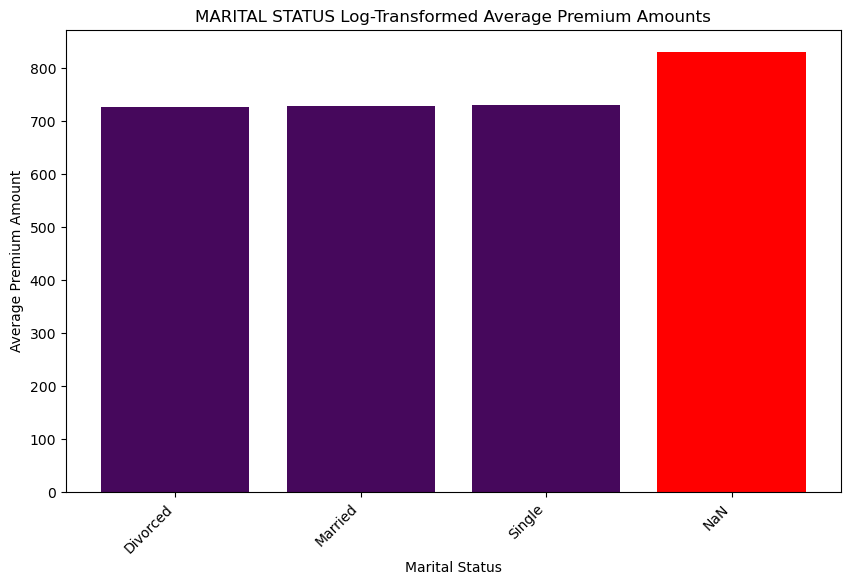

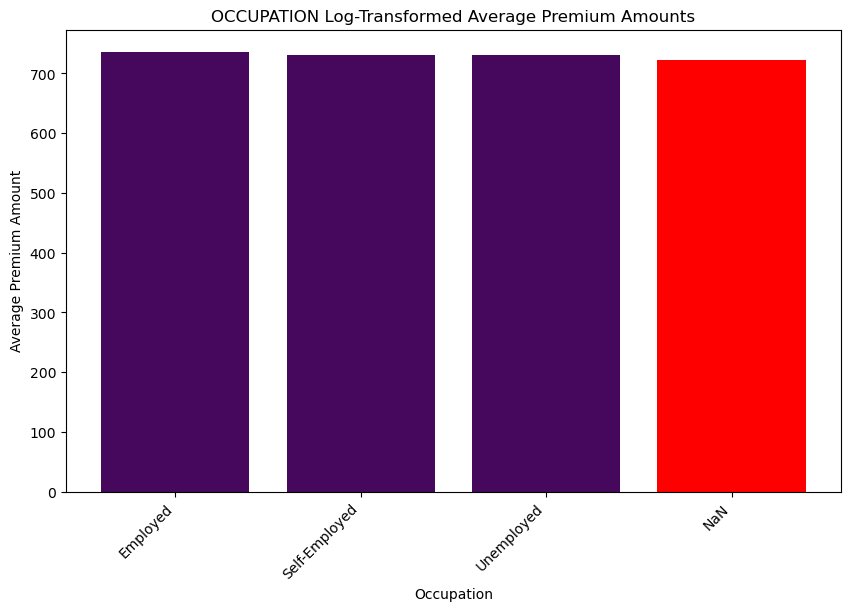

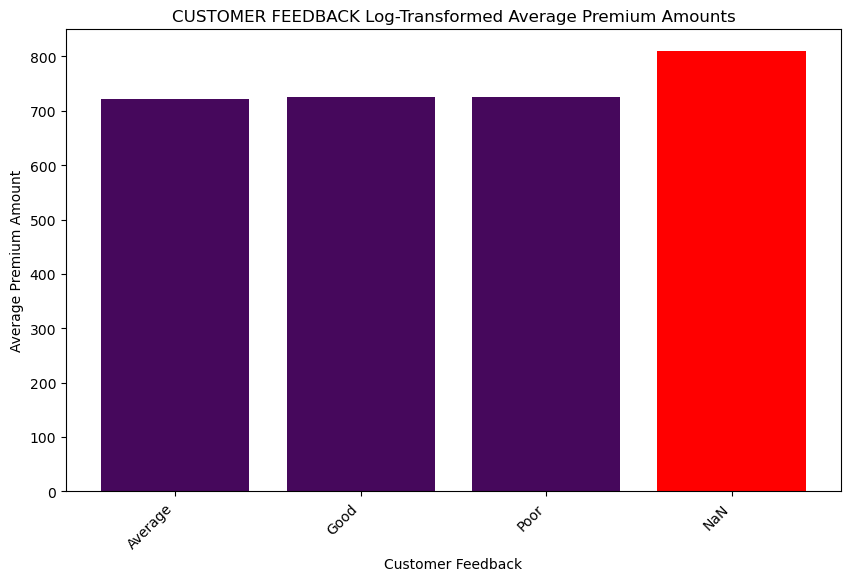

In [60]:
# List of object-type columns with missing values
object_missing_columns = ['Marital Status', 'Occupation', 'Customer Feedback']

for column in object_missing_columns:
    # Group by the column and calculate the average log-transformed Premium Amount
    grouped = train.groupby(column)['Premium Amount'].agg(
        lambda x: np.expm1(np.log1p(x).mean())  # Use log-transform to calculate mean
    ).reset_index()
    
    # Calculate the average log-transformed Premium Amount for missing (NaN) values
    nan_group_mean = np.expm1(np.log1p(train.loc[train[column].isnull(), 'Premium Amount']).mean())
    
    # Add a row for the NaN group
    nan_group = pd.DataFrame({column: ['NaN'], 'Premium Amount': [nan_group_mean]})
    grouped = pd.concat([grouped, nan_group], ignore_index=True)
    
    # Use viridis color palette for the bars
    viridis_colors = viridis(range(256))  
    bar_colors = [viridis_colors[5]] * (len(grouped) - 1) + ['red']  

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(grouped[column].astype(str), grouped['Premium Amount'], color=bar_colors)
    
    # Set labels and title
    plt.title(f'{column.upper()} Log-Transformed Average Premium Amounts')
    plt.ylabel('Average Premium Amount')
    plt.xlabel(column)
    plt.xticks(rotation=45, ha='right')  
    plt.show()



### Visual Exploration

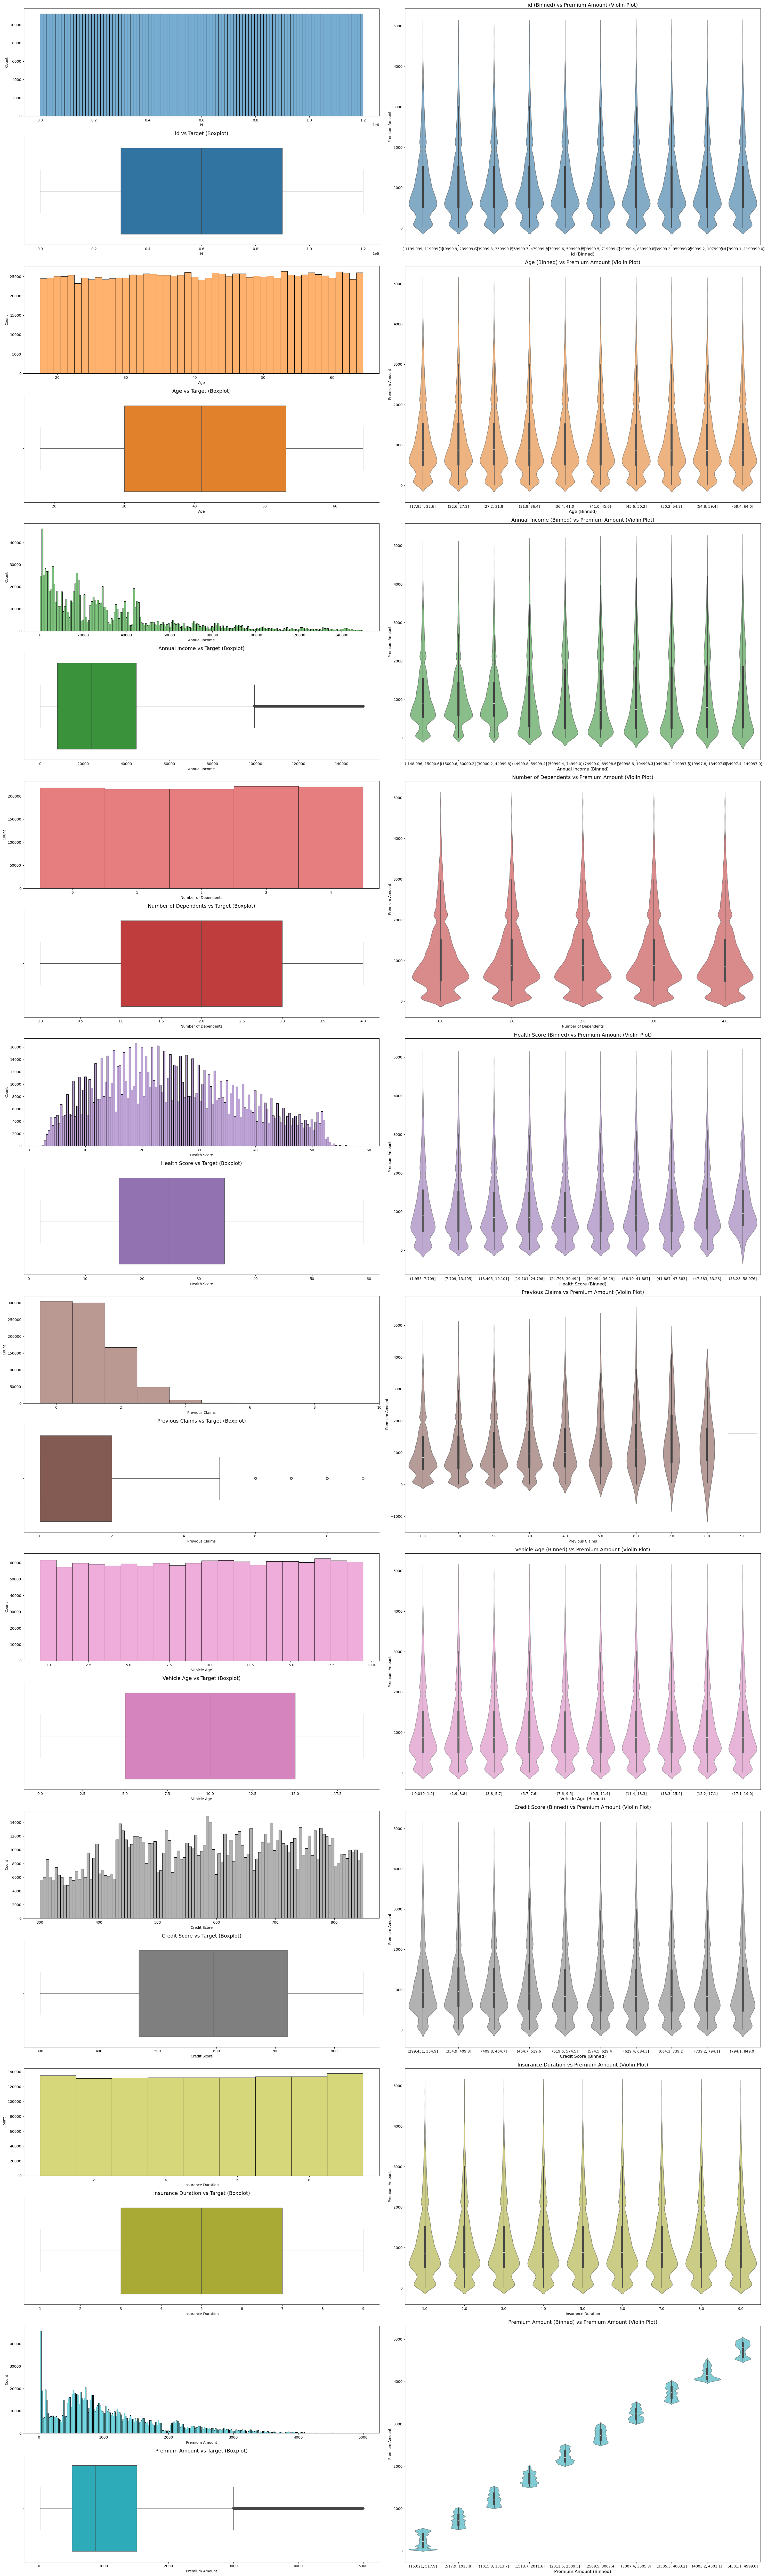

In [61]:
import matplotlib.gridspec as gridspec

palette = sns.color_palette('tab10', len(num_cols))
color_dict = dict(zip(num_cols, palette))

fig = plt.figure(figsize=(30, 10 * len(num_cols)))
gs = gridspec.GridSpec(2 * len(num_cols), 2, figure=fig)

df_binned = train.copy()

for i, col in enumerate(num_cols):
    discrete = train[col].nunique() < 51

    # Plot histogram with a unique color
    ax_hist = fig.add_subplot(gs[2 * i, 0])
    sns.histplot(
        data=train, x=col, fill=True, common_norm=False, alpha=0.6,
        linewidth=0.8, color=color_dict[col], ax=ax_hist, discrete=discrete
    )

    # Plot boxplot with same unique color
    ax_box = fig.add_subplot(gs[2 * i + 1, 0])
    sns.boxplot(data=train, x=col, ax=ax_box, color=color_dict[col])
    ax_box.set_title(f'{col} vs Target (Boxplot)', fontsize=14)
    sns.despine(ax=ax_box)

    # Conditional plot: Violin plot or barplot based on unique values, fallback to scatterplot
    ax_conditional = fig.add_subplot(gs[2 * i : 2 * i + 2, 1])     # Merges 2 rows

    if train[col].nunique() < 11:
        sns.violinplot(
            data=train, x=col, y=target_col, ax=ax_conditional,
            color=color_dict[col], alpha=0.6
        )
        ax_conditional.set_title(f'{col} vs {target_col} (Violin Plot)', fontsize=14)
    
    else:
        df_binned[col + " Binned"] = pd.cut(train[col], bins=10)
        sns.violinplot(
            data=df_binned,
            x=col + " Binned",
            y=target_col,
            ax=ax_conditional,
            color=color_dict[col],
            alpha=0.6
        )
        ax_conditional.set_title(f'{col} (Binned) vs {target_col} (Violin Plot)', fontsize=14)
        ax_conditional.set_xlabel(f'{col} (Binned)', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\yashs\AppData\Local\Temp\ipykernel_20720\3904051819.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\yashs\AppData\Local\Temp\ipykernel_20720\3904051819.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\yashs\AppData\Local\Temp\ipykernel_20720\3904051819.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\yashs\AppData\Local\Temp\ipykernel_20720\3904051819.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

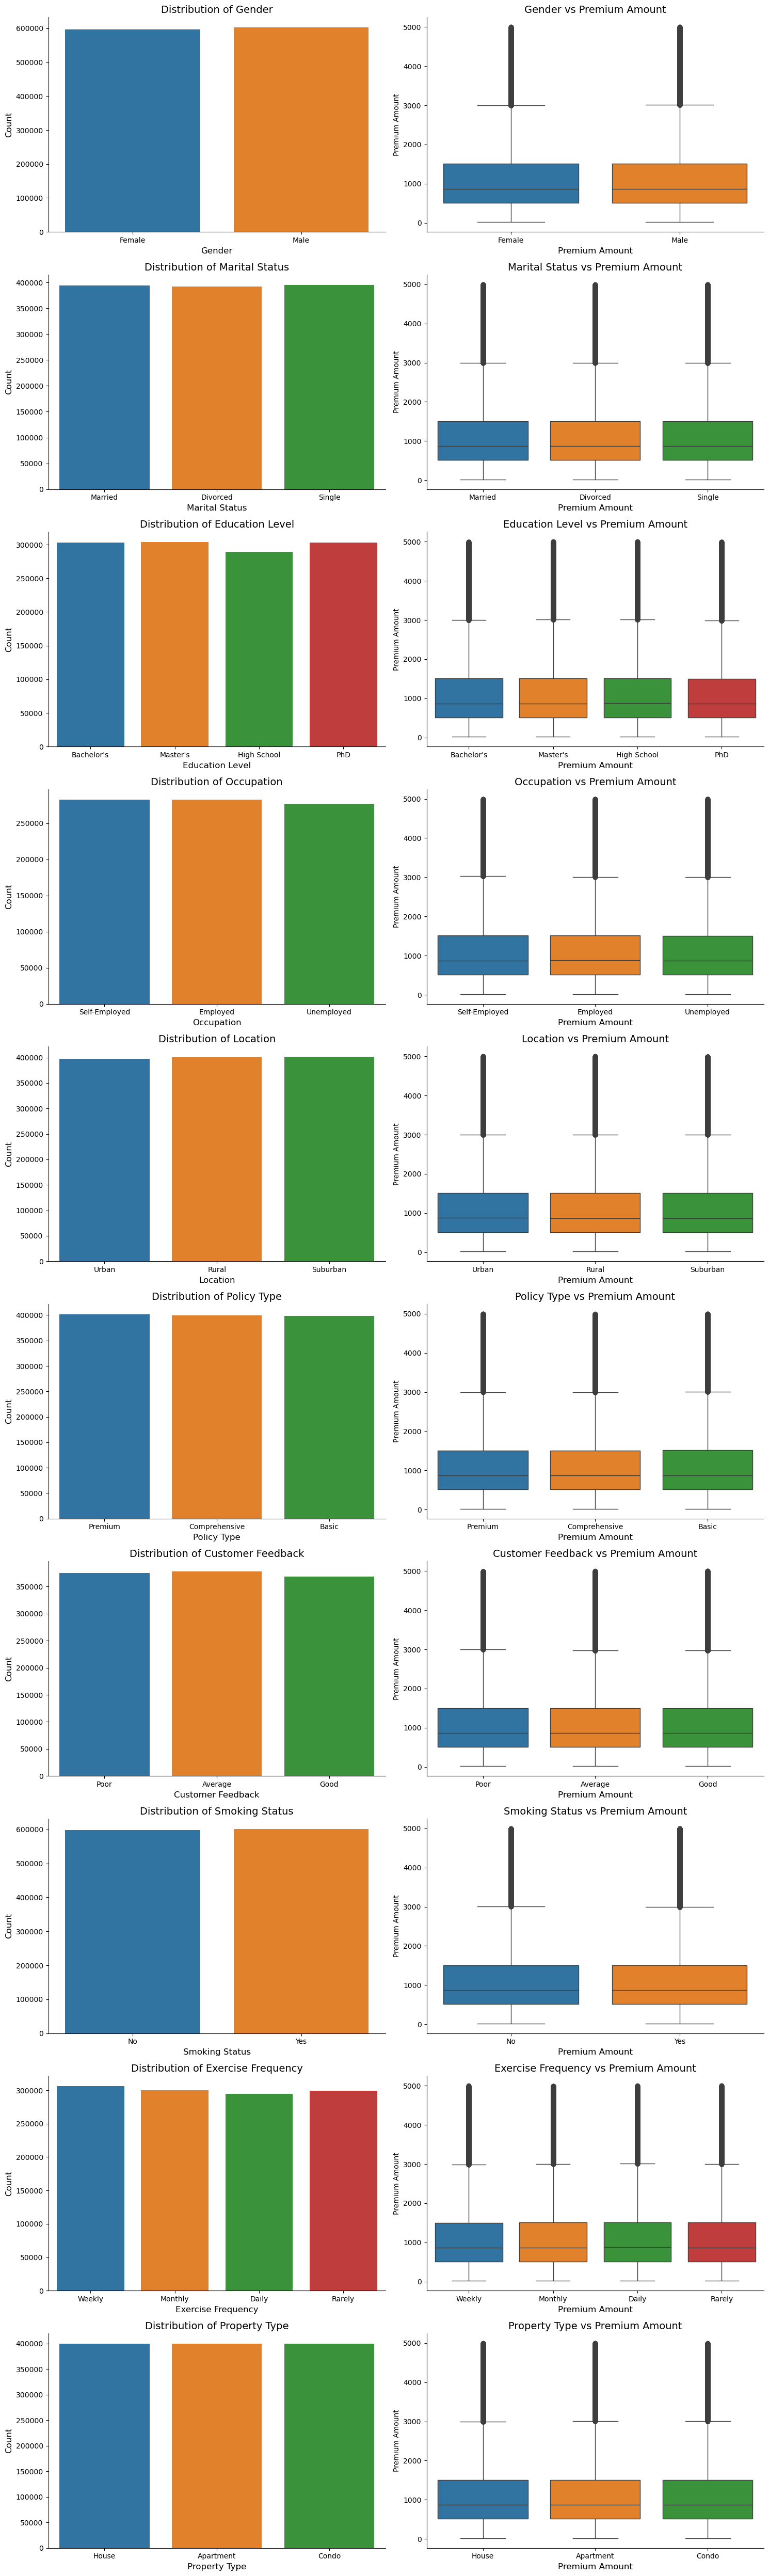

In [62]:
filtered_cols = [col for col in cat_cols if col != 'Policy Start Date']

fig, axes = plt.subplots(len(filtered_cols), 2, figsize=(15, 5 * len(filtered_cols)))

for i, col in enumerate(filtered_cols):
    # Barplot
    sns.countplot(
        data=train,
        x=col,
        ax=axes[i, 0],
        palette='tab10'
    )

    axes[i, 0].set_title(f'Distribution of {col}', fontsize=14)
    axes[i, 0].set_xlabel(col, fontsize=12)
    axes[i, 0].set_ylabel('Count', fontsize=12)
    sns.despine(ax=axes[i, 0])

    # Boxplot
    sns.boxplot(
        data=train,
        x=col,
        y=target_col,
        ax=axes[i, 1],
        palette='tab10'
    )

    axes[i, 1].set_title(f'{col} vs {target_col}', fontsize=14)
    axes[i, 1].set_xlabel(col, fontsize=12)
    axes[i, 1].set_xlabel(target_col, fontsize=12)
    sns.despine(ax=axes[i, 1])

plt.tight_layout()
plt.show()


C:\Users\yashs\AppData\Local\Temp\ipykernel_20720\3624440288.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


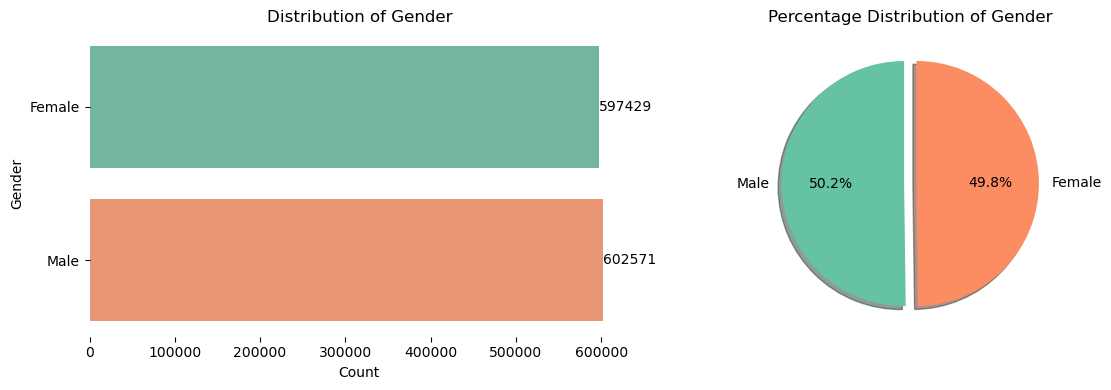

C:\Users\yashs\AppData\Local\Temp\ipykernel_20720\3624440288.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


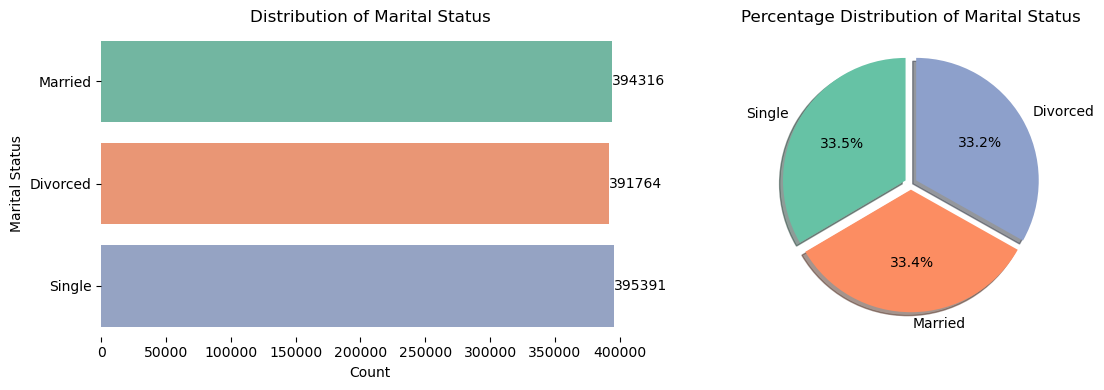

C:\Users\yashs\AppData\Local\Temp\ipykernel_20720\3624440288.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


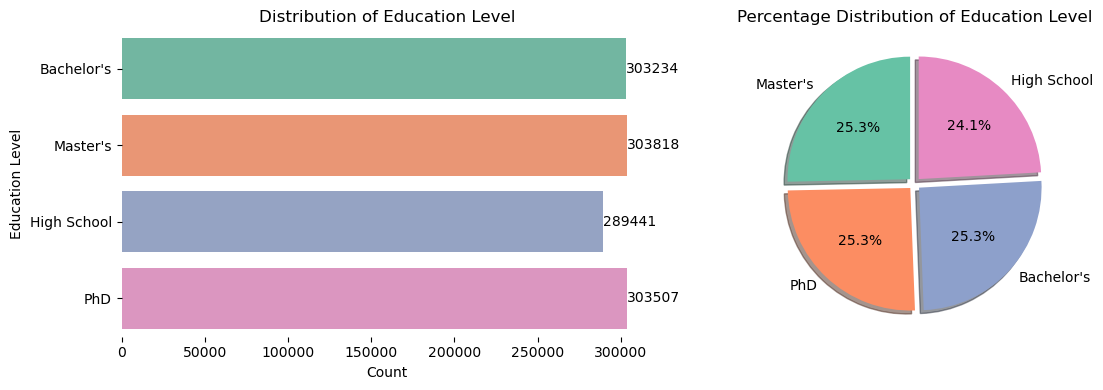

C:\Users\yashs\AppData\Local\Temp\ipykernel_20720\3624440288.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


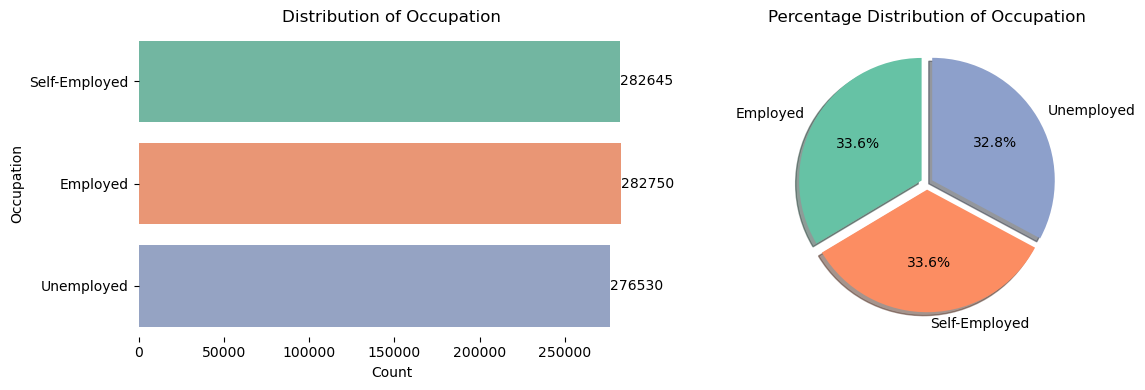

C:\Users\yashs\AppData\Local\Temp\ipykernel_20720\3624440288.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


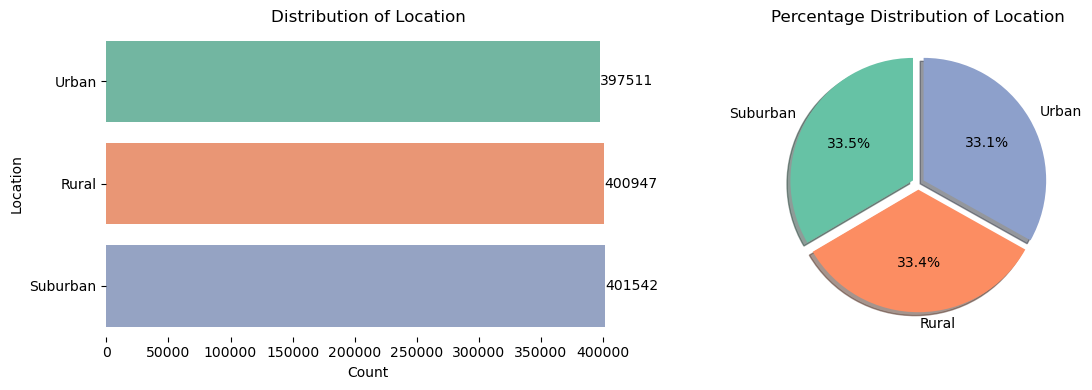

C:\Users\yashs\AppData\Local\Temp\ipykernel_20720\3624440288.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


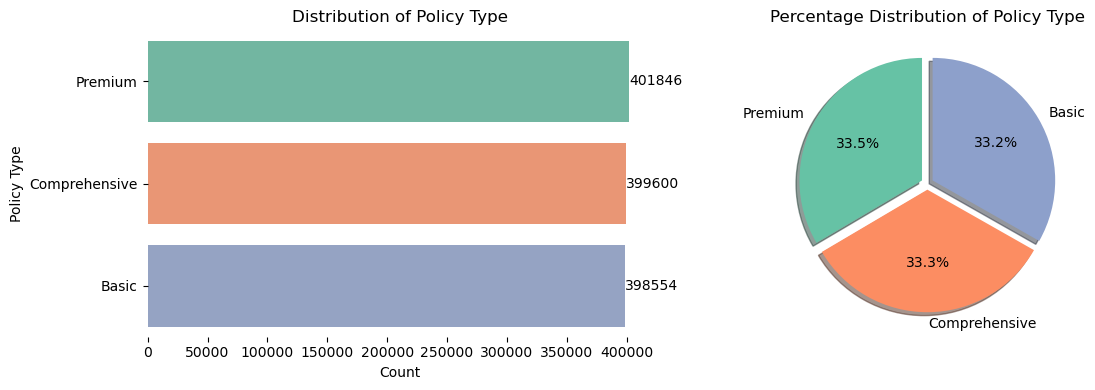

C:\Users\yashs\AppData\Local\Temp\ipykernel_20720\3624440288.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


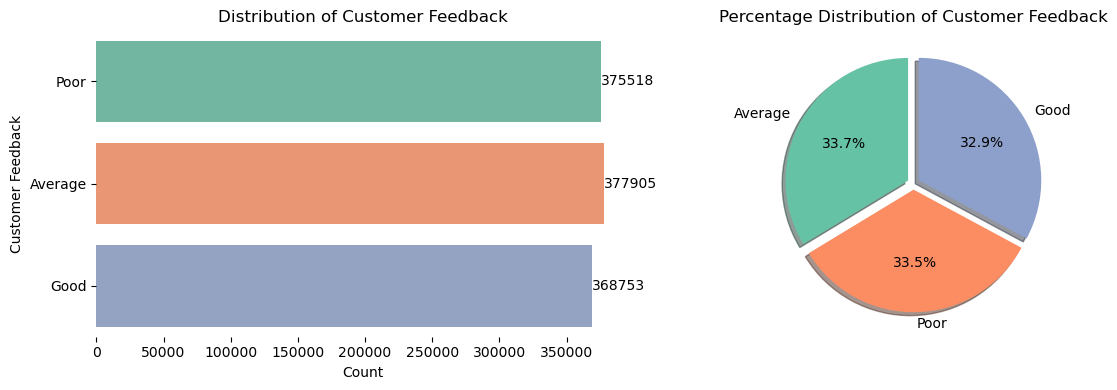

C:\Users\yashs\AppData\Local\Temp\ipykernel_20720\3624440288.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


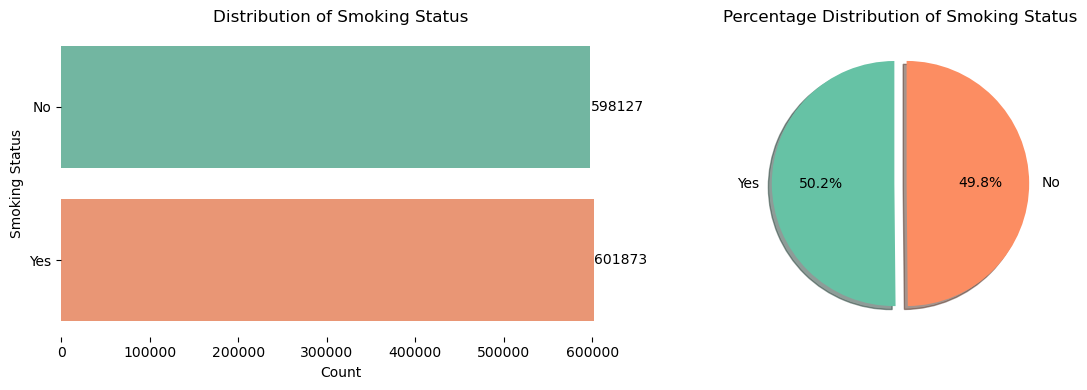

C:\Users\yashs\AppData\Local\Temp\ipykernel_20720\3624440288.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


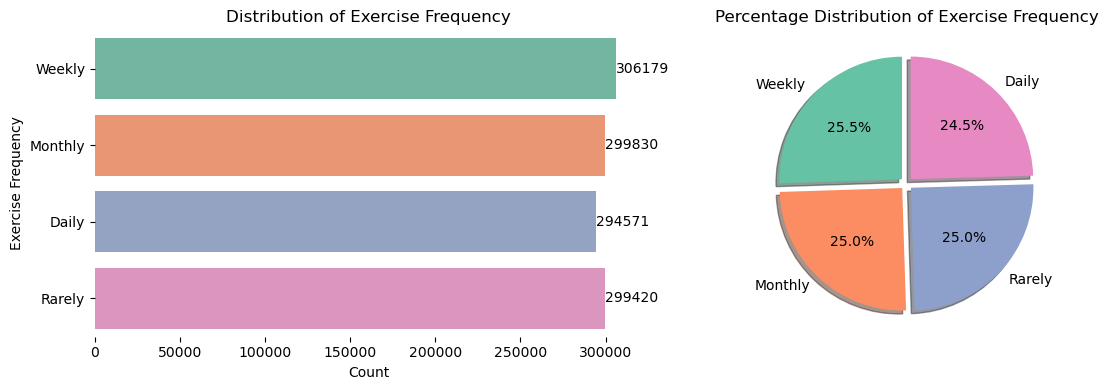

C:\Users\yashs\AppData\Local\Temp\ipykernel_20720\3624440288.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


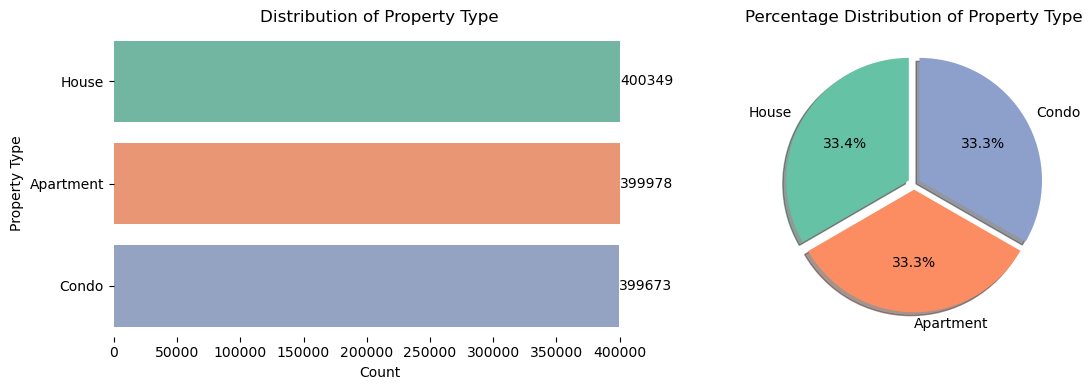

In [63]:
# Function to display barplot and pie chart for categorical columns
def plot_categorical_distribution(data, column_name):
    plt.figure(figsize=(12, 4))
    
    # Bar plot for categorical distribution
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=data, palette='Set2')
    plt.title(f'Distribution of {column_name}', fontsize=12)
    plt.xlabel('Count', fontsize=10)
    plt.ylabel(column_name, fontsize=10)

    ax = plt.gca()
    for p in ax.patches:
        count = int(p.get_width())
        ax.annotate(f'{count}', 
                    (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', fontsize=10, color='black')
    
    sns.despine(left=True, bottom=True)
    
    # Pie chart for percentage distribution
    plt.subplot(1, 2, 2)
    data[column_name].value_counts().plot.pie(
        autopct='%1.1f%%', 
        colors=sns.color_palette('Set2', data[column_name].nunique()), 
        startangle=90, 
        explode=[0.05] * data[column_name].nunique(), 
        shadow=True
    )
    plt.title(f'Percentage Distribution of {column_name}', fontsize=12)
    plt.ylabel('')  

    plt.tight_layout()
    plt.show()

categorical_columns = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 
                'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']

for column in categorical_columns:
    plot_categorical_distribution(train, column)

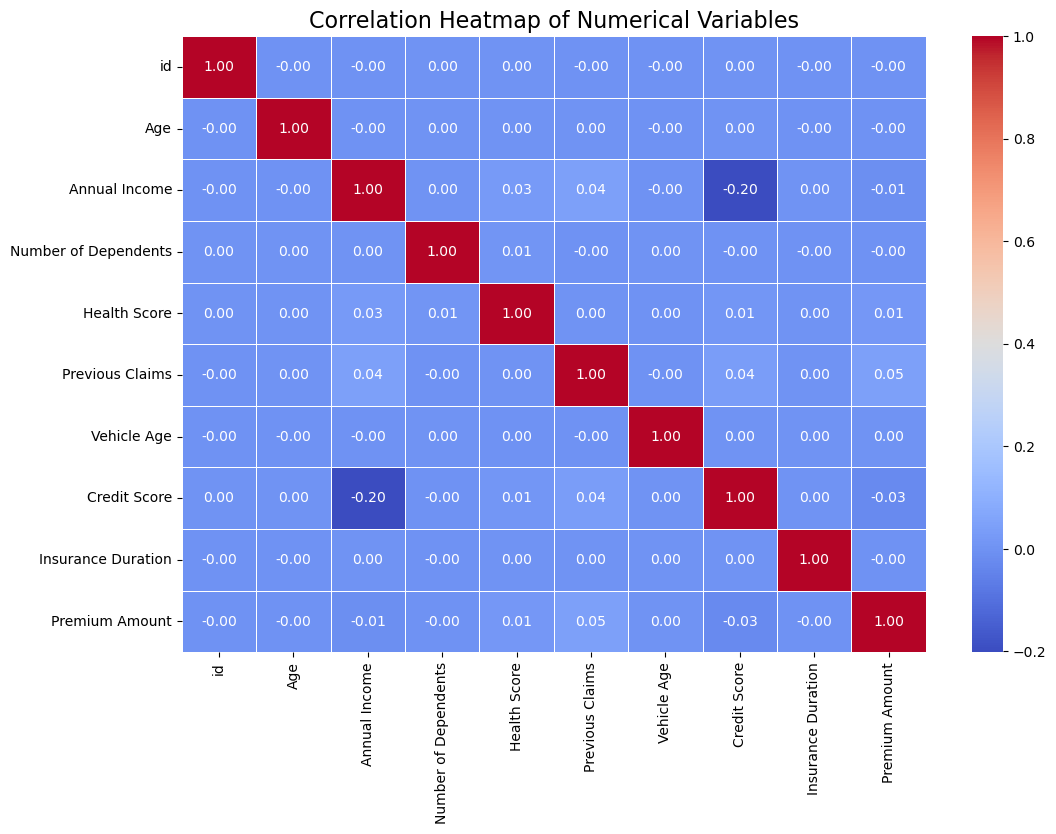

In [64]:
corr_mat = train[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_mat,
    annot=True,
    fmt='.2f',
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()

## Data Processing

### Feature Transformation: Date Handling
We transform the `Policy Start Date` feature into multiple useful data-related features.

In [65]:
import numpy as np

def date(df):

    feat = 'Policy Start Date'
    df[feat] = pd.to_datetime(df[feat])
    
    df['Year'] = df[feat].dt.year


    min_year, max_year = df['Year'].min(), df['Year'].max()
    df['Year_sin'] = np.sin(2 * np.pi * (df['Year'] - min_year) / (max_year - min_year))
    df['Year_cos'] = np.cos(2 * np.pi * (df['Year'] - min_year) / (max_year - min_year))

    
    df['Month'] = df[feat].dt.month
    df['Month_name'] = df[feat].dt.month_name()
    df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
    df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

    df['Week'] = df[feat].dt.isocalendar().week
    df['Day_of_week'] = df[feat].dt.day_name()

    df['Day'] = df[feat].dt.day
    df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)
    df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)

    df['Group'] = (df['Year'] - 2020) * 48 + df['Month'] * 4 + df['Day'] // 7

    df.drop(feat, axis=1, inplace=True)

    return df

train = date(train)
test = date(test)


### Splitting Data

In [66]:
X = train.drop(columns=[target_col, 'id', 'Group', 'Year', 'Month', 'Day', 'Week'])
y = train[target_col]

### Handling Missing Values & Preprocessing Pipeline

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Numerical feature Pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        # ('scaler', StandardScaler())
    ]
)


# Categorical feature Pipeline
cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)


# Combining pipelines into a ColumnTransformer
num_feats = X.select_dtypes(exclude='object').columns
cat_feats = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_feats),
        ('cat', cat_pipeline, cat_feats)
    ]
)

X_processed = preprocessor.fit_transform(X)
test_processed = preprocessor.transform(test.drop(columns=['id', 'Group', 'Year', 'Month', 'Day', 'Week']))

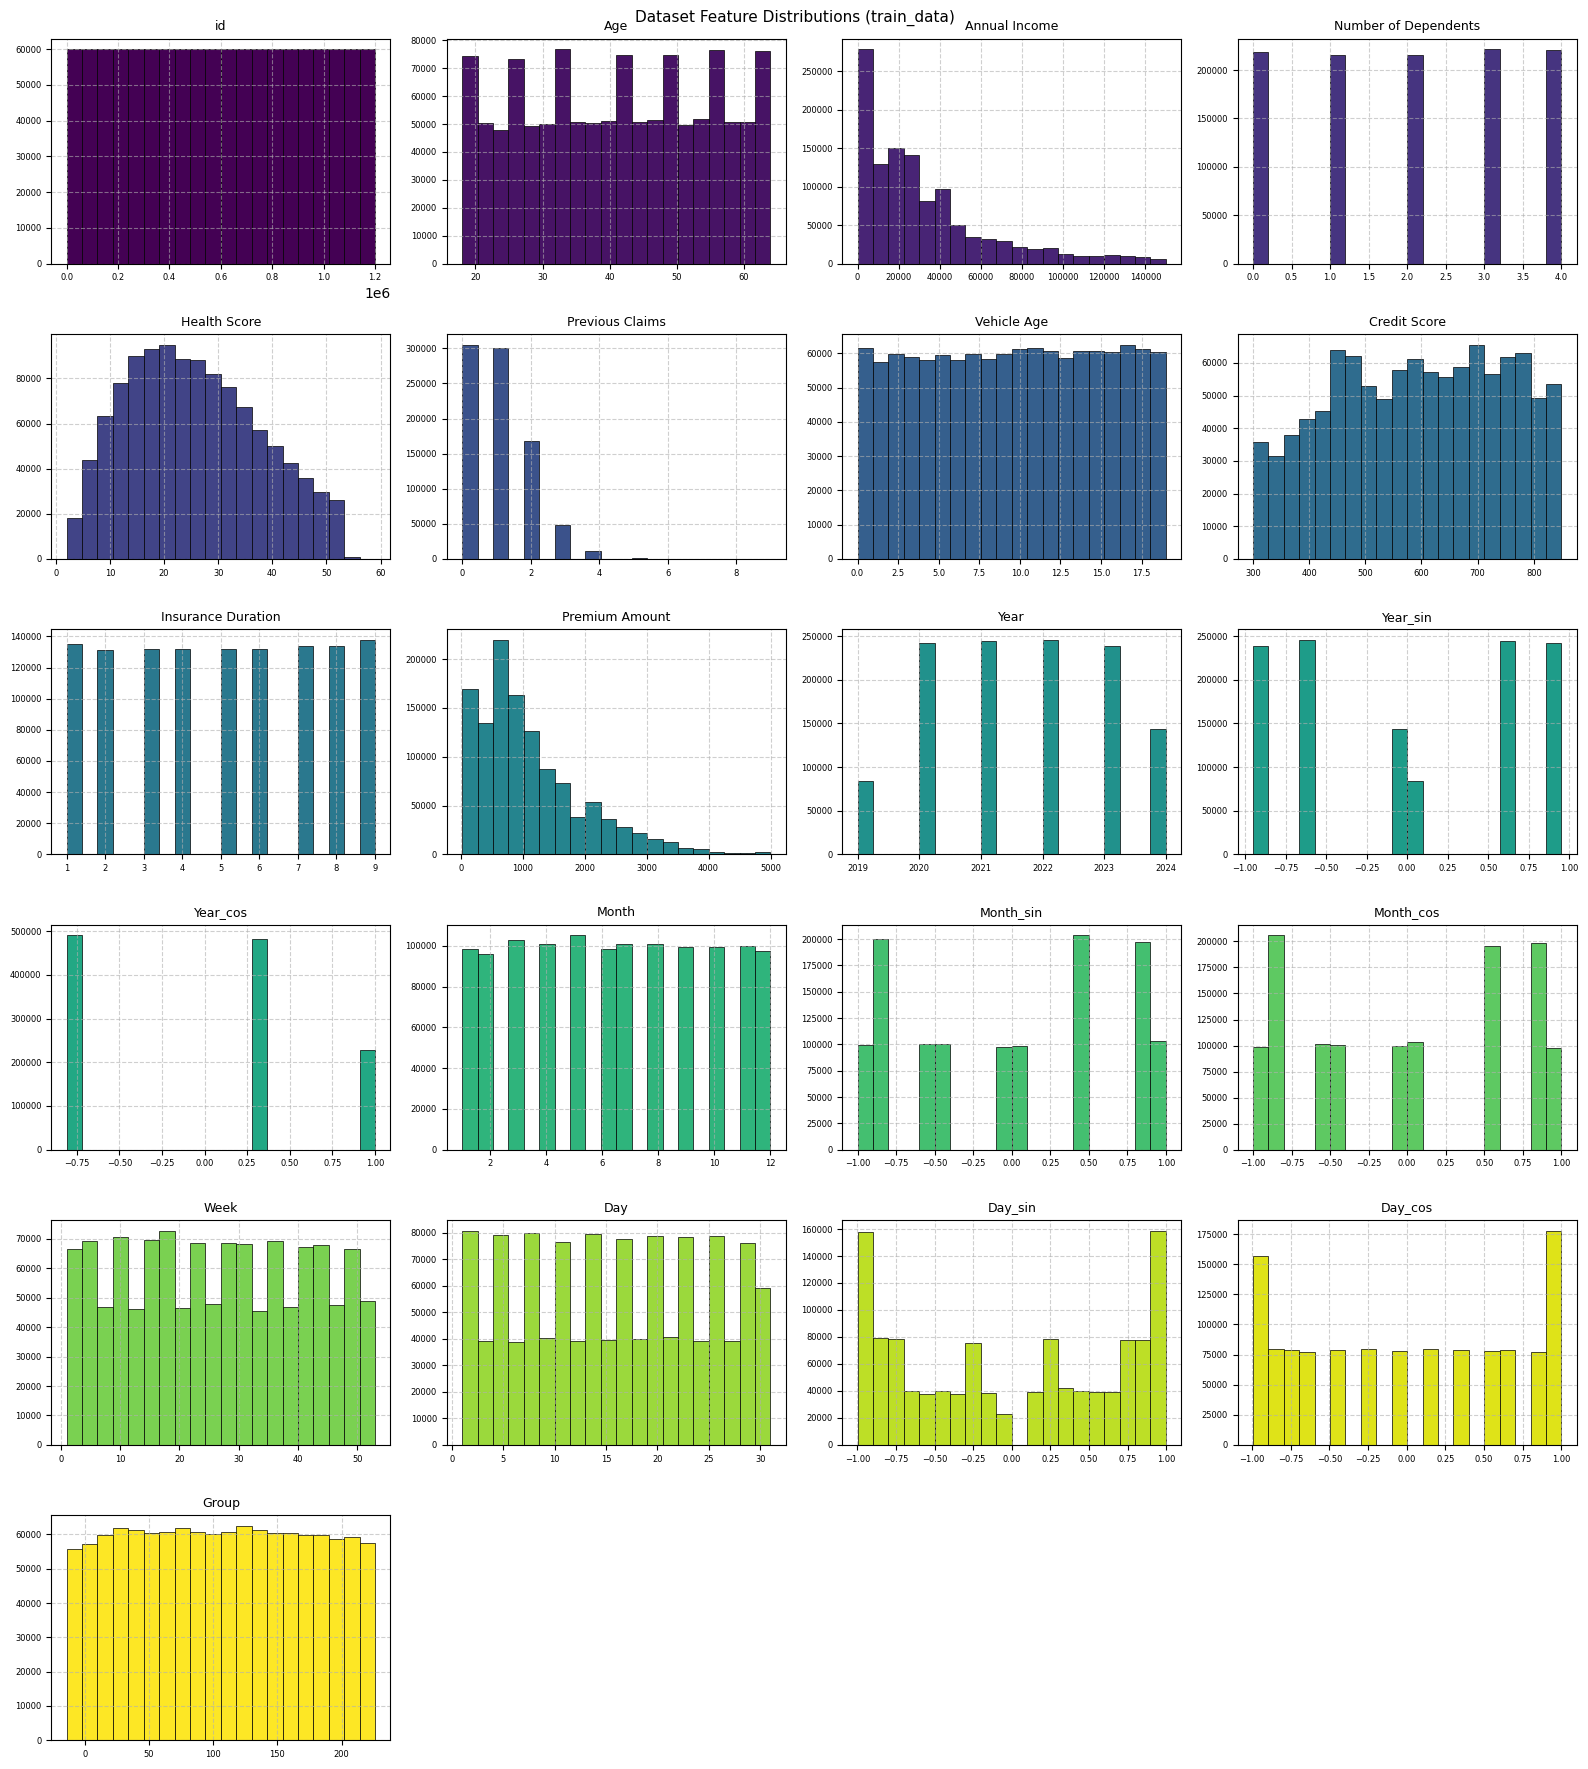

In [75]:
import math

# Identify numeric columns only (excluding boolean columns)
numeric_columns = train.select_dtypes(include=[np.number]).columns

# Calculate the number of rows and columns needed
num_features = len(numeric_columns)
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, num_rows * 3))
viridis_cmap = plt.get_cmap('viridis', len(numeric_columns))

# Plot each numeric column
for i, column in enumerate(numeric_columns):
    ax = axes.flatten()[i]
    train[column].hist(
        ax=ax, 
        bins=20, 
        color=viridis_cmap(i / len(numeric_columns)),  
        edgecolor='black', 
        linewidth=0.5
    )
    ax.set_title(column, fontsize=9)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.grid(True, linestyle='--', alpha=0.6)  

# Remove empty subplots if any
for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

plt.suptitle('Dataset Feature Distributions (train_data)', fontsize=11)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

### Hyperparameter Optimisation

In [33]:
import optuna
import lightgbm as lgb
from sklearn.metrics import root_mean_squared_log_error, mean_squared_error, mean_absolute_error, r2_score


# Define Optuna optimization function
def objective(trial):
    # Define parameter search space
    param = {
        "objective": "regression",
        "metric": "rmse",
        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart"]),
        "num_leaves": trial.suggest_int("num_leaves", 200, 512),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
        "feature_fraction": trial.suggest_uniform("feature_fraction", 0.6, 1.0),
        "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.6, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 5, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100),
        "max_depth": trial.suggest_int("max_depth", -1, 16),  # -1 means no limit
        "lambda_l1": trial.suggest_loguniform("lambda_l1", 1e-4, 10.0),
        "lambda_l2": trial.suggest_loguniform("lambda_l2", 1e-4, 10.0),
        "device_type": "gpu",  # Enable GPU support
        "seed" : 42

    }

    # Create a LightGBM dataset
    dtrain = lgb.Dataset(X_train, label=y_train)
    dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)

    # Train LightGBM model
    model = lgb.train(
        param,
        dtrain,
        valid_sets=[dval],
    )

    # Predict on validation set
    y_val_pred = model.predict(X_val)
    
    # Compute RMSLE using sklearn's root_mean_squared_log_error
    rmsle = root_mean_squared_log_error(y_val, np.maximum(y_val_pred, 0))
    return rmsle

# Run Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=1)

[I 2025-01-23 08:51:12,606] A new study created in memory with name: no-name-bd1ff93f-dbbb-4f5f-a755-2248a93aa86b
C:\Users\yashs\AppData\Local\Temp\ipykernel_1604\3102734560.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
C:\Users\yashs\AppData\Local\Temp\ipykernel_1604\3102734560.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.6, 1.0),
C:\Users\yashs\AppData\Local\Temp\ipykernel_1604\3102734560.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/relea

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 66
[LightGBM] [Info] Using GPU Device: gfx1150, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 26 dense feature groups (25.63 MB) transferred to GPU in 0.040146 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1102.505529
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 26 dense feature groups (16.51 MB) transferred to GPU in 0.023282 secs. 0 sparse feature groups
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 26 dense feature groups (16.48 MB) transferred to GPU in 0.025970 secs. 0 sparse feature groups
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 26 dense feature groups (16.

[I 2025-01-23 08:51:47,088] Trial 0 finished with value: 1.1724943519011377 and parameters: {'boosting_type': 'dart', 'num_leaves': 371, 'learning_rate': 0.0015709105938707599, 'feature_fraction': 0.7315340408096609, 'bagging_fraction': 0.6428435469115056, 'bagging_freq': 10, 'min_data_in_leaf': 98, 'max_depth': 16, 'lambda_l1': 0.0024091980164258294, 'lambda_l2': 0.00041484298437625283}. Best is trial 0 with value: 1.1724943519011377.


### Model Training

In [35]:
# Train final model with best parameters
best_params = study.best_params

final_model = lgb.train(
    best_params,
    lgb.Dataset(X_processed, label=y),
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1040
[LightGBM] [Info] Number of data points in the train set: 1200000, number of used features: 66
[LightGBM] [Info] Start training from score 1102.544822


### Model Evaluation

In [36]:
y_pred = final_model.predict(X_processed)

rmsle = root_mean_squared_log_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

# Display performance metrics
print(f"\nPerformance Metrics:\n{'-'*30}")
print(f"RMSLE: {rmsle:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")


Performance Metrics:
------------------------------
RMSLE: 1.1049
RMSE: 987.9902
MAE: 679.4740
R²: -0.3046
MAPE: 173.93%


C:\Users\yashs\AppData\Local\Temp\ipykernel_1604\237034793.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


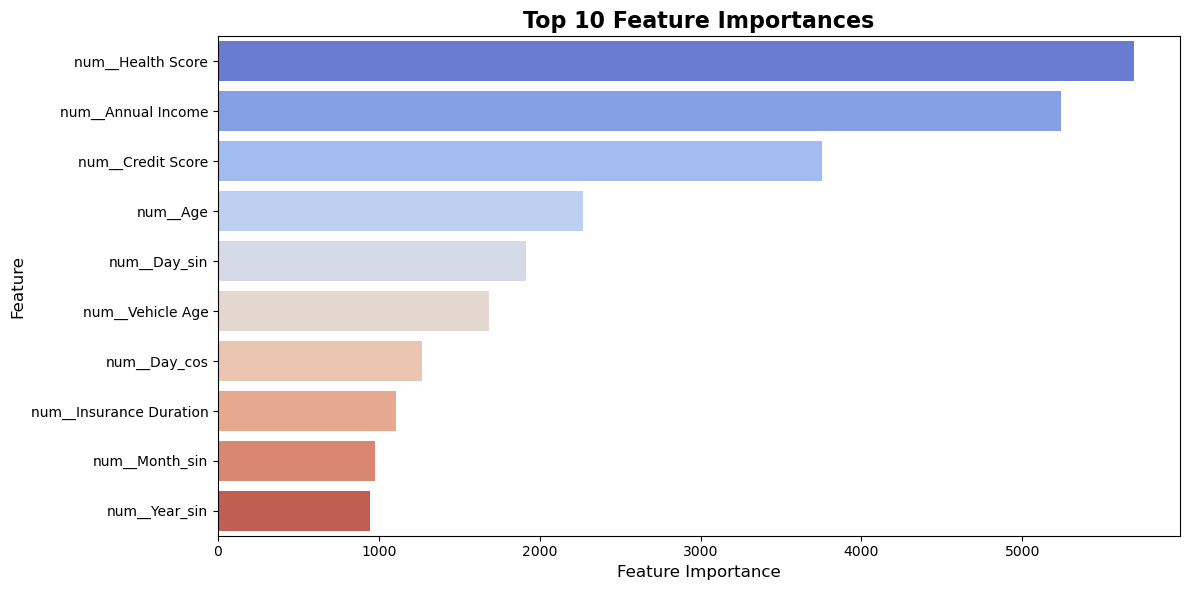

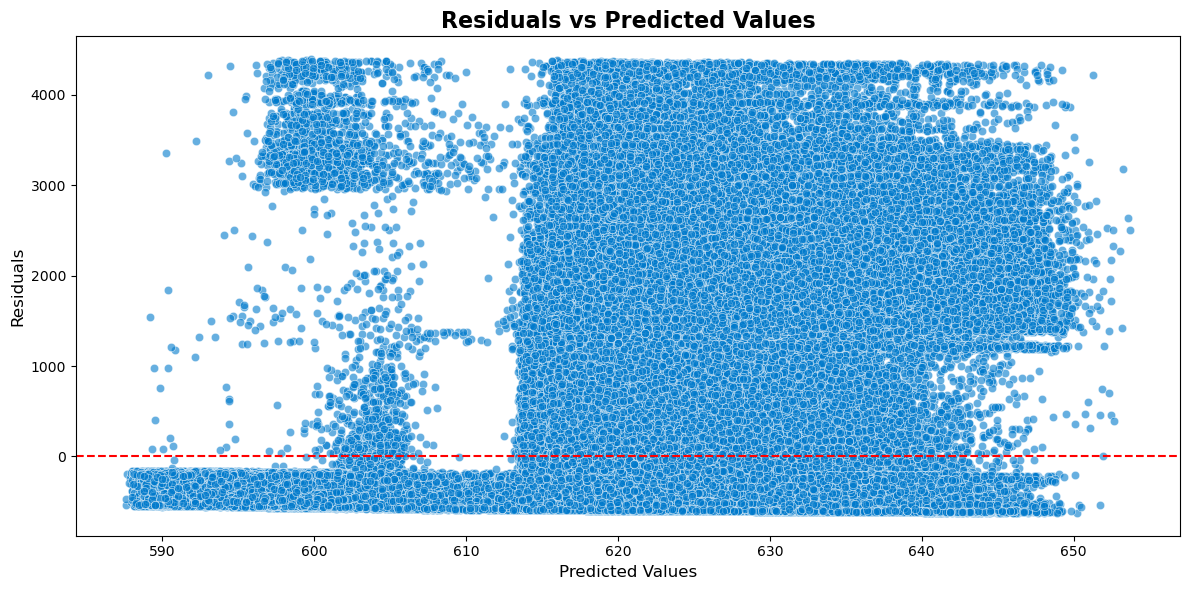

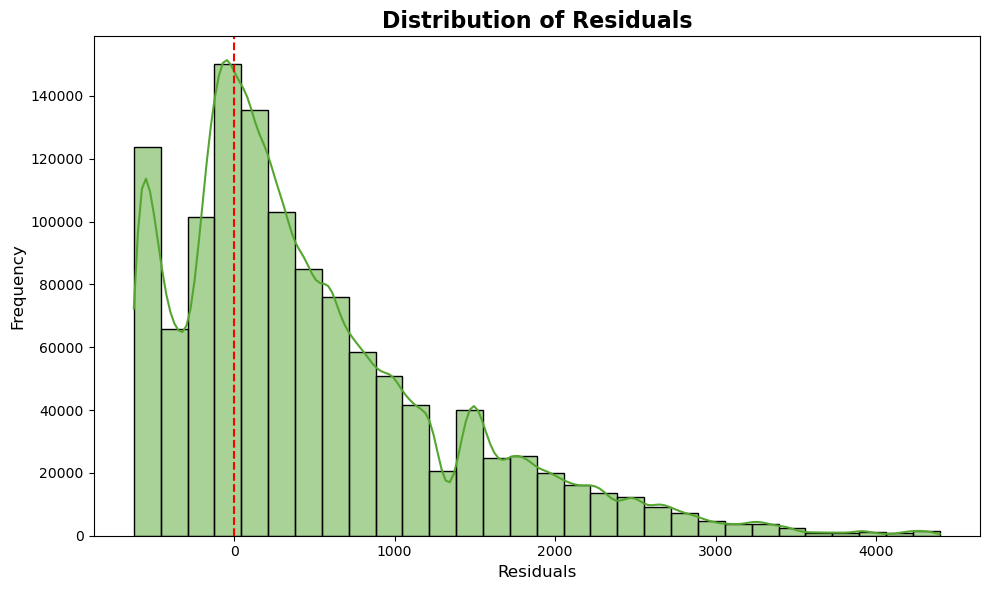

In [37]:
# Feature Importance
importances = final_model.feature_importance(importance_type='split')   # or 'gain
features = preprocessor.get_feature_names_out()
sorted_indices = importances.argsort()[::-1]


importance_df = pd.DataFrame({
    'Feature': [features[i] for i in sorted_indices],
    'Importance': importances[sorted_indices]
})


plt.figure(figsize=(12, 6))
sns.barplot(
    data=importance_df.head(10),
    x='Importance',
    y='Feature',
    palette='coolwarm'
)
plt.title("Top 10 Feature Importances", fontsize=16, fontweight='bold')
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

# Residual Analysis
residuals = y - y_pred


plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=y_pred,
    y=residuals,
    alpha=0.6,
    color='#007acc'
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title("Residuals vs Predicted Values", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(
    residuals,
    bins=30,
    kde=True,
    color='#55a630'
)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5)
plt.title("Distribution of Residuals", fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()